In [1]:
from google.colab import files
uploaded=files.upload()

Saving Data_Train.xlsx to Data_Train.xlsx


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
train=pd.read_excel('Data_Train.xlsx')

In [5]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
train.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [7]:
train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [8]:
train.shape

(6019, 13)

In [9]:
numF=train.select_dtypes(include=[np.number])
numF.head()

,Year,Kilometers_Driven,Seats,Price
0,2010,72000,5.0,1.75
1,2015,41000,5.0,12.50
2,2011,46000,5.0,4.50
3,2012,87000,7.0,6.00
4,2013,40670,5.0,17.74


In [10]:
catF=train.select_dtypes(include=[np.object])
catF.head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,NaN
2,Honda Jazz V,Chennai,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,NaN


In [11]:
train['Name'].unique().size

1876

In [12]:
t=train['Name'].str.split()
compName=t.str[0]
train['Comp_Name']=pd.Series(compName)
#train.insert(column='Comp_Name',value=compName,loc=1)
train.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Comp_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi


In [13]:
catF.insert(column='Comp_Name',value=compName,loc=1)
catF['Comp_Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [14]:
cn=catF['Comp_Name'].values
cn

array(['Maruti', 'Hyundai', 'Honda', ..., 'Mahindra', 'Maruti',
       'Chevrolet'], dtype=object)

In [15]:
train.loc[train['Comp_Name']=='Land']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Comp_Name
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,Land
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,Land
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,Land
311,Land Rover Range Rover HSE Dynamic,Delhi,2017,44000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,44.00,Land
399,Land Rover Range Rover 2.2L Dynamic,Hyderabad,2012,56000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,30.00,Land
404,Land Rover Range Rover 2.2L Prestige,Coimbatore,2017,34990,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,53.83,Land
410,Land Rover Range Rover 2.2L Pure,Coimbatore,2014,95649,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,29.67,Land
480,Land Rover Range Rover Evoque 2.0 TD4 Pure,Delhi,2015,24000,Diesel,Automatic,Second,15.68 kmpl,1999 CC,177 bhp,5.0,NaN,33.50,Land
521,Land Rover Range Rover HSE Dynamic,Coimbatore,2017,49275,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,45.64,Land
701,Land Rover Freelander 2 SE,Chennai,2011,109000,Diesel,Automatic,First,12.39 kmpl,2179 CC,147.51 bhp,5.0,NaN,16.50,Land


In [0]:
for i in range(train.shape[0]):
  if (cn[i]=='Land'):
    cn[i]='Land Rover'
  if (cn[i]=='ISUZU'):
    cn[i]='Isuzu'
  if (cn[i]=='Mini'):
    cn[i]='Mini Cooper'
  if (cn[i]=='Force'):
    cn[i]='Force One LX'

In [0]:
train=train.drop('Comp_Name',axis=1)
catF=catF.drop('Comp_Name',axis=1)

In [0]:
train.insert(column='Comp_Name',value=cn,loc=1)
catF.insert(column='Comp_Name',value=cn,loc=1)

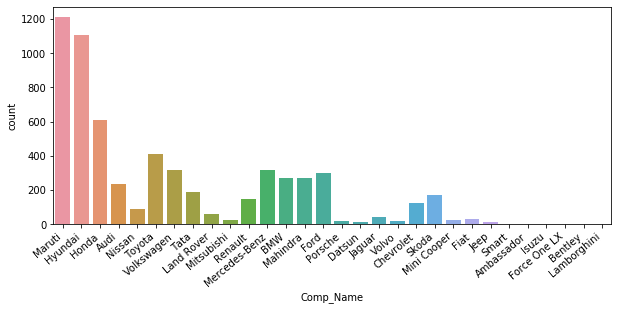

In [19]:
plt.figure(figsize=(10,4))
a=sns.countplot('Comp_Name',data=train)
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
plt.show()

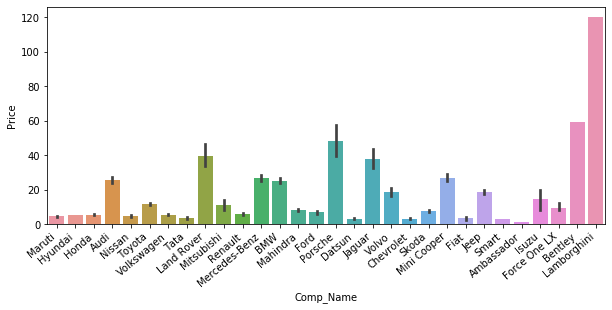

In [20]:
plt.figure(figsize=(10,4))
b=sns.barplot(x='Comp_Name',y='Price',data=train)
b.set_xticklabels(b.get_xticklabels(),rotation=40,ha='right')
plt.show()

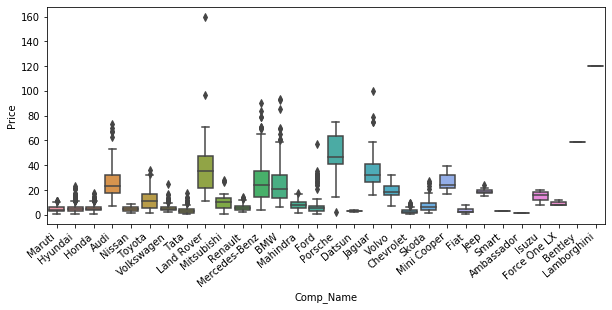

In [21]:
plt.figure(figsize=(10,4))
b=sns.boxplot('Comp_Name','Price',data=train)
b.set_xticklabels(b.get_xticklabels(),rotation=40,ha='right')
plt.show()

<function matplotlib.pyplot.show>

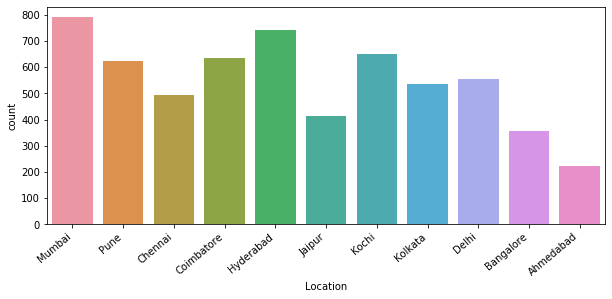

In [22]:
plt.figure(figsize=(10,4))
a=sns.countplot('Location',data=train)
a.set_xticklabels(a.get_xticklabels(),rotation=40,ha='right')
plt.show

<function matplotlib.pyplot.show>

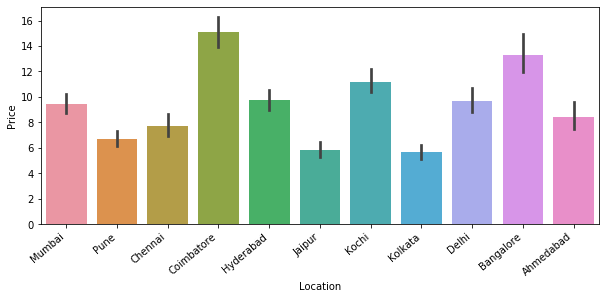

In [23]:
plt.figure(figsize=(10,4))
a=sns.barplot('Location','Price',data=train)
a.set_xticklabels(a.get_xticklabels(),rotation=40,ha='right')
plt.show

<function matplotlib.pyplot.show>

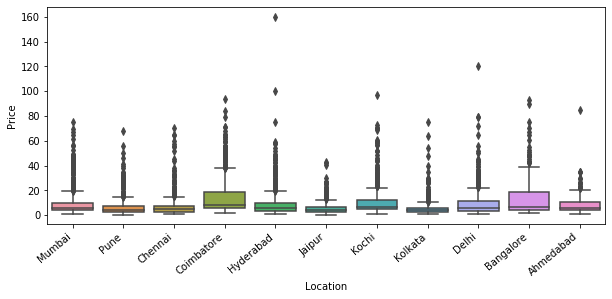

In [24]:
plt.figure(figsize=(10,4))
a=sns.boxplot('Location','Price',data=train)
a.set_xticklabels(a.get_xticklabels(),rotation=40,ha='right')
plt.show

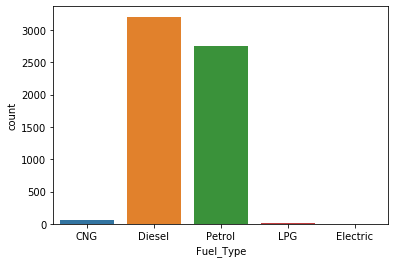

In [25]:
sns.countplot('Fuel_Type',data=train)

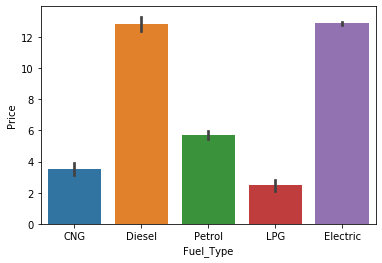

In [26]:
sns.barplot('Fuel_Type','Price',data=train)

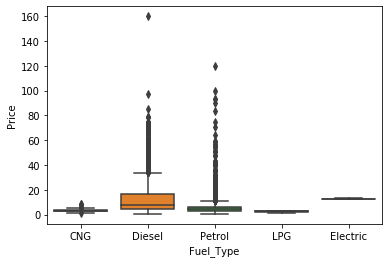

In [27]:
sns.boxplot('Fuel_Type','Price',data=train)

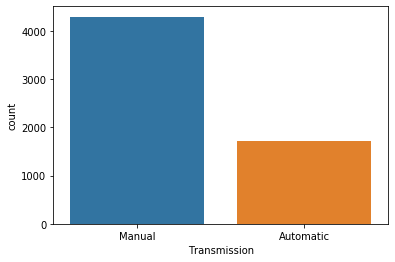

In [28]:
sns.countplot('Transmission',data=train)

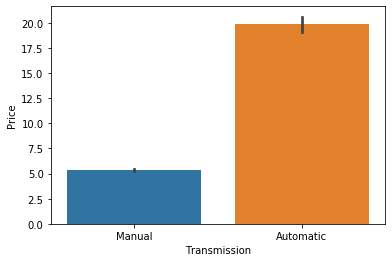

In [29]:
sns.barplot('Transmission','Price',data=train)

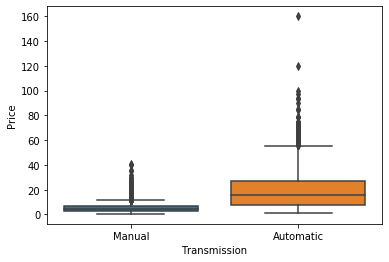

In [30]:
sns.boxplot('Transmission','Price',data=train)

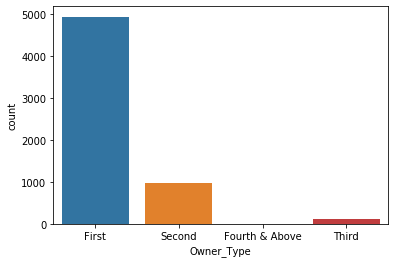

In [31]:
sns.countplot('Owner_Type',data=train)

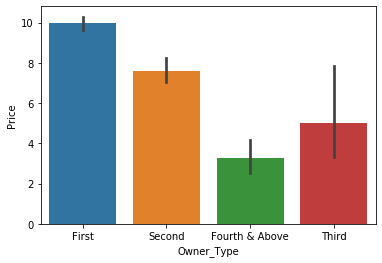

In [32]:
sns.barplot('Owner_Type','Price',data=train)

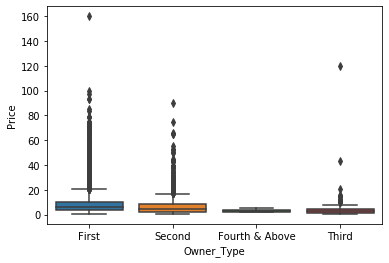

In [33]:
sns.boxplot('Owner_Type','Price',data=train)

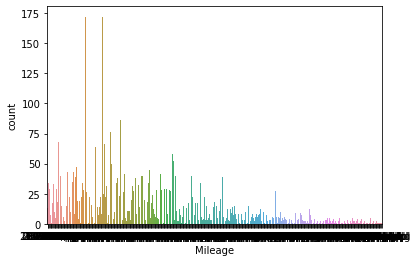

In [34]:
sns.countplot('Mileage',data=train)

In [35]:
train['Mileage']

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 6019, dtype: object

In [36]:
t=train['Mileage'].str.split()
mylg=t.str[0]
mylgCount=t.str[1]
mylgCount.value_counts()

kmpl     5951
km/kg      66
Name: Mileage, dtype: int64

In [37]:
train.insert(column='Mileage_Num',value=mylg,loc=8)
train.head()

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [38]:
numF.insert(column='Mileage_Num',value=mylg,loc=3)
numF

,Year,Kilometers_Driven,Seats,Mileage_Num,Price
0,2010,72000,5.0,26.6,1.75
1,2015,41000,5.0,19.67,12.50
2,2011,46000,5.0,18.2,4.50
3,2012,87000,7.0,20.77,6.00
4,2013,40670,5.0,15.2,17.74
...,...,...,...,...,...
6014,2014,27365,5.0,28.4,4.75
6015,2015,100000,5.0,24.4,4.00
6016,2012,55000,8.0,14.0,2.90
6017,2013,46000,5.0,18.9,2.65


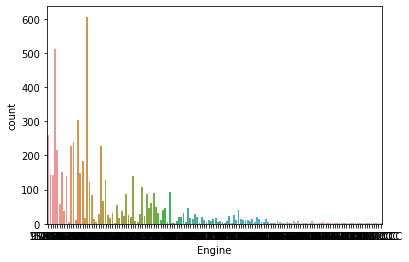

In [39]:
sns.countplot('Engine',data=train)

In [40]:
train['Engine']

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
6014    1248 CC
6015    1120 CC
6016    2498 CC
6017     998 CC
6018     936 CC
Name: Engine, Length: 6019, dtype: object

In [0]:
t=train['Engine'].str.split()
engNum=t.str[0]
train.insert(column='Engine_Num',value=engNum,loc=10)
numF.insert(column='Engine_Num',value=engNum,loc=4)

In [42]:
train.head()

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine_Num,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,26.6 km/kg,998,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,19.67 kmpl,1582,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,18.2 kmpl,1199,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,20.77 kmpl,1248,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,15.2 kmpl,1968,1968 CC,140.8 bhp,5.0,NaN,17.74


In [43]:
numF.head()

,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Price
0,2010,72000,5.0,26.6,998,1.75
1,2015,41000,5.0,19.67,1582,12.50
2,2011,46000,5.0,18.2,1199,4.50
3,2012,87000,7.0,20.77,1248,6.00
4,2013,40670,5.0,15.2,1968,17.74


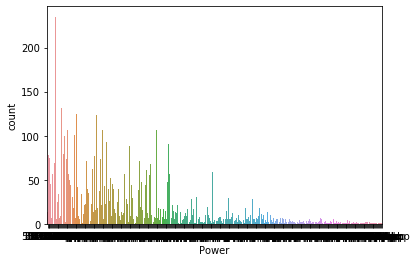

In [44]:
sns.countplot('Power',data=train)

In [45]:
train['Power']

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 6019, dtype: object

In [0]:
t=train['Power'].str.split()
power=t.str[0]
train.insert(column='Power_Num',value=power,loc=12)
numF.insert(column='Power_Num',value=power,loc=5)

In [47]:
train.head()

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine_Num,Engine,Power_Num,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,26.6 km/kg,998,998 CC,58.16,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,19.67 kmpl,1582,1582 CC,126.2,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,18.2 kmpl,1199,1199 CC,88.7,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,20.77 kmpl,1248,1248 CC,88.76,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,15.2 kmpl,1968,1968 CC,140.8,140.8 bhp,5.0,NaN,17.74


In [48]:
numF.head()

,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Power_Num,Price
0,2010,72000,5.0,26.6,998,58.16,1.75
1,2015,41000,5.0,19.67,1582,126.2,12.50
2,2011,46000,5.0,18.2,1199,88.7,4.50
3,2012,87000,7.0,20.77,1248,88.76,6.00
4,2013,40670,5.0,15.2,1968,140.8,17.74


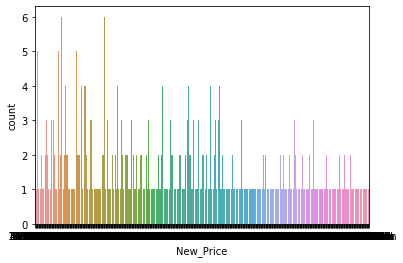

In [49]:
sns.countplot('New_Price',data=train)

In [50]:
train['New_Price']

0             NaN
1             NaN
2       8.61 Lakh
3             NaN
4             NaN
          ...    
6014    7.88 Lakh
6015          NaN
6016          NaN
6017          NaN
6018          NaN
Name: New_Price, Length: 6019, dtype: object

In [51]:
t=train['New_Price'].str.split()
newPrice=t.str[0]
npType=t.str[1]
npType.value_counts()

Lakh    807
Cr       17
Name: New_Price, dtype: int64

In [0]:
for i in range(train.shape[0]):
  if (npType[i]== 'Cr'):
    newPrice[i]=float(newPrice[i])*100

In [0]:
train.insert(column='NewPrice_Num',value=newPrice,loc=15)
numF.insert(column='NewPrice_Num',value=newPrice,loc=6)

In [54]:
catF.drop(['Engine','Mileage','Power','Name'],axis=1)

,Comp_Name,Location,Fuel_Type,Transmission,Owner_Type,New_Price
0,Maruti,Mumbai,CNG,Manual,First,NaN
1,Hyundai,Pune,Diesel,Manual,First,NaN
2,Honda,Chennai,Petrol,Manual,First,8.61 Lakh
3,Maruti,Chennai,Diesel,Manual,First,NaN
4,Audi,Coimbatore,Diesel,Automatic,Second,NaN
...,...,...,...,...,...,...
6014,Maruti,Delhi,Diesel,Manual,First,7.88 Lakh
6015,Hyundai,Jaipur,Diesel,Manual,First,NaN
6016,Mahindra,Jaipur,Diesel,Manual,Second,NaN
6017,Maruti,Kolkata,Petrol,Manual,First,NaN


In [55]:
train.head()

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine_Num,Engine,Power_Num,Power,Seats,NewPrice_Num,New_Price,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,26.6 km/kg,998,998 CC,58.16,58.16 bhp,5.0,NaN,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,19.67 kmpl,1582,1582 CC,126.2,126.2 bhp,5.0,NaN,NaN,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,18.2 kmpl,1199,1199 CC,88.7,88.7 bhp,5.0,8.61,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,20.77 kmpl,1248,1248 CC,88.76,88.76 bhp,7.0,NaN,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,15.2 kmpl,1968,1968 CC,140.8,140.8 bhp,5.0,NaN,NaN,17.74


In [56]:
numF.head()

,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Power_Num,NewPrice_Num,Price
0,2010,72000,5.0,26.6,998,58.16,NaN,1.75
1,2015,41000,5.0,19.67,1582,126.2,NaN,12.50
2,2011,46000,5.0,18.2,1199,88.7,8.61,4.50
3,2012,87000,7.0,20.77,1248,88.76,NaN,6.00
4,2013,40670,5.0,15.2,1968,140.8,NaN,17.74


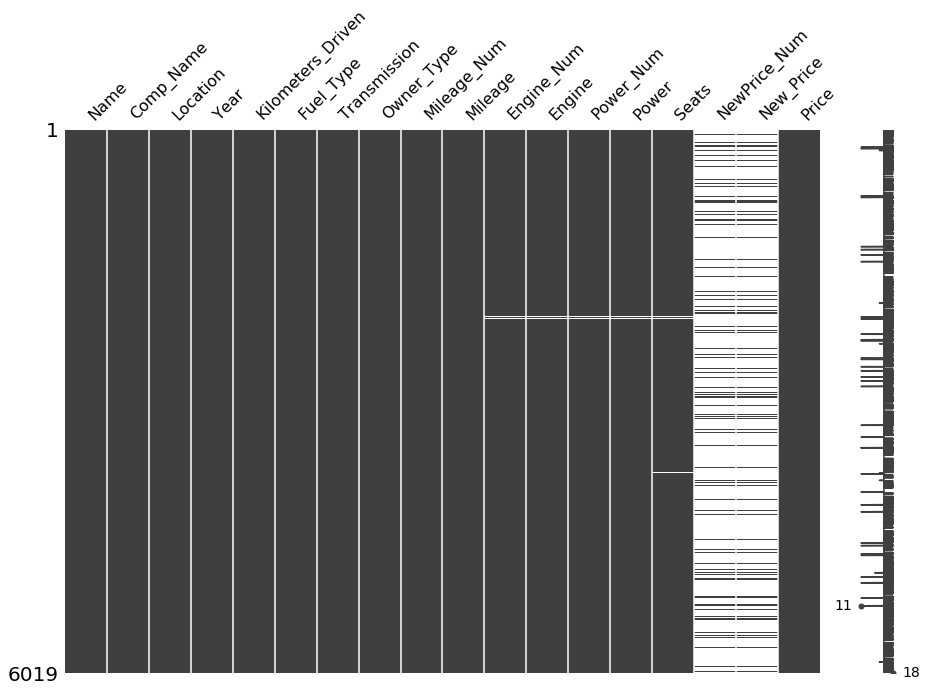

In [57]:
import missingno as msno
msno.matrix(df=train,figsize=(15,10))

In [58]:
train.isnull().sum()

Name                    0
Comp_Name               0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_Num             2
Mileage                 2
Engine_Num             36
Engine                 36
Power_Num              36
Power                  36
Seats                  42
NewPrice_Num         5195
New_Price            5195
Price                   0
dtype: int64

In [0]:
train=train.fillna(0)
numF=numF.fillna(0)

In [60]:
train.isnull().sum()

Name                 0
Comp_Name            0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage_Num          0
Mileage              0
Engine_Num           0
Engine               0
Power_Num            0
Power                0
Seats                0
NewPrice_Num         0
New_Price            0
Price                0
dtype: int64

In [0]:

train['Mileage_Num']=train['Mileage_Num'].astype(float)
train['Engine_Num']=train['Engine_Num'].astype(float)
#train['Power_Num']=train['Power_Num'].astype(float)
train['NewPrice_Num']=train['NewPrice_Num'].astype(float)

In [62]:
train.loc[train['Power_Num']=='null']

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine_Num,Engine,Power_Num,Power,Seats,NewPrice_Num,New_Price,Price
76,Ford Fiesta 1.4 SXi TDCi,Ford,Jaipur,2008,111111,Diesel,Manual,First,17.80,17.8 kmpl,1399.0,1399 CC,null,null bhp,5.0,0.0,0,2.00
79,Hyundai Santro Xing XL,Hyundai,Hyderabad,2005,87591,Petrol,Manual,First,0.00,0.0 kmpl,1086.0,1086 CC,null,null bhp,5.0,0.0,0,1.30
89,Hyundai Santro Xing XO,Hyundai,Hyderabad,2007,73745,Petrol,Manual,First,17.00,17.0 kmpl,1086.0,1086 CC,null,null bhp,5.0,0.0,0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Hyundai,Mumbai,2005,102000,Petrol,Manual,Second,17.00,17.0 kmpl,1086.0,1086 CC,null,null bhp,5.0,0.0,0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Hyundai,Kochi,2008,80759,Petrol,Manual,Third,17.00,17.0 kmpl,1086.0,1086 CC,null,null bhp,5.0,0.0,0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Hyundai,Pune,2006,47200,Petrol,Manual,Second,17.00,17.0 kmpl,1086.0,1086 CC,null,null bhp,5.0,0.0,0,1.20
5893,Maruti Estilo LXI,Maruti,Chennai,2008,51000,Petrol,Manual,Second,19.50,19.5 kmpl,1061.0,1061 CC,null,null bhp,0.0,0.0,0,1.75
5925,Skoda Laura Classic 1.8 TSI,Skoda,Pune,2010,85000,Petrol,Manual,First,17.50,17.5 kmpl,1798.0,1798 CC,null,null bhp,5.0,0.0,0,2.85
5943,Mahindra Jeep MM 540 DP,Mahindra,Chennai,2002,75000,Diesel,Manual,First,0.00,0.0 kmpl,2112.0,2112 CC,null,null bhp,6.0,0.0,0,1.70


In [93]:
numF.loc[numF['Power_Num']=='null']

,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Power_Num,NewPrice_Num,Price
76,2008,111111,5.0,17.8,1399,null,0,2.00
79,2005,87591,5.0,0.0,1086,null,0,1.30
89,2007,73745,5.0,17.0,1086,null,0,2.10
120,2005,102000,5.0,17.0,1086,null,0,0.85
143,2008,80759,5.0,17.0,1086,null,0,1.67
...,...,...,...,...,...,...,...,...
5873,2006,47200,5.0,17.0,1086,null,0,1.20
5893,2008,51000,0.0,19.5,1061,null,0,1.75
5925,2010,85000,5.0,17.5,1798,null,0,2.85
5943,2002,75000,6.0,0.0,2112,null,0,1.70


In [94]:
train.loc[train['Power_Num']=='null','Power_Num']=0
numF.loc[numF['Power_Num']=='null','Power_Num']=0

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [96]:
train.loc[train['Power_Num']=='null']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine_Num,Engine,Power_Num,Power,Seats,NewPrice_Num,New_Price,Price


In [97]:
numF.loc[numF['Power_Num']=='null']

,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Power_Num,NewPrice_Num,Price


In [0]:
train['Power_Num']=train['Power_Num'].astype(float)

In [66]:
train['Power_Num'].unique()

array([ 58.16 , 126.2  ,  88.7  ,  88.76 , 140.8  ,  55.2  ,  63.1  ,
       171.5  , 103.6  ,  74.   , 103.25 , 116.3  , 187.7  , 115.   ,
       175.56 ,  98.6  ,  83.8  , 167.62 , 190.   ,  88.5  , 177.01 ,
        80.   ,  67.1  , 102.   , 108.45 , 138.1  , 184.   , 179.5  ,
       103.5  ,  64.   ,  82.   , 254.8  ,  73.9  ,  46.3  ,  37.5  ,
        77.   ,  82.9  , 149.92 , 138.03 , 112.2  , 163.7  ,  71.   ,
       105.   , 174.33 ,  75.   , 103.2  ,  53.3  ,  78.9  , 147.6  ,
       147.8  ,  68.   , 186.   , 170.   ,  69.   , 140.   ,  78.   ,
       194.   , 500.   , 108.5  ,  86.8  , 187.74 ,   0.   , 132.   ,
        86.7  ,  73.94 , 117.3  , 218.   , 168.5  ,  89.84 , 110.   ,
        90.   ,  82.85 ,  67.   , 241.4  ,  35.   , 270.9  , 126.32 ,
        73.   , 130.   , 100.6  , 150.   ,  75.94 , 215.   , 107.3  ,
        37.48 , 120.   , 178.   , 152.   ,  91.1  ,  85.8  , 362.07 ,
       121.3  , 143.   ,  81.8  , 171.   ,  76.8  , 103.52 , 444.   ,
       362.9  ,  67.

In [67]:
train.head()

,Name,Comp_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Num,Mileage,Engine_Num,Engine,Power_Num,Power,Seats,NewPrice_Num,New_Price,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,26.6 km/kg,998.0,998 CC,58.16,58.16 bhp,5.0,0.00,0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,19.67 kmpl,1582.0,1582 CC,126.20,126.2 bhp,5.0,0.00,0,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,18.2 kmpl,1199.0,1199 CC,88.70,88.7 bhp,5.0,8.61,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,20.77 kmpl,1248.0,1248 CC,88.76,88.76 bhp,7.0,0.00,0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,15.2 kmpl,1968.0,1968 CC,140.80,140.8 bhp,5.0,0.00,0,17.74


In [68]:
numF.head()

,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Power_Num,NewPrice_Num,Price
0,2010,72000,5.0,26.6,998,58.16,0,1.75
1,2015,41000,5.0,19.67,1582,126.2,0,12.50
2,2011,46000,5.0,18.2,1199,88.7,8.61,4.50
3,2012,87000,7.0,20.77,1248,88.76,0,6.00
4,2013,40670,5.0,15.2,1968,140.8,0,17.74


In [69]:
train.corr()

,Year,Kilometers_Driven,Mileage_Num,Engine_Num,Power_Num,Seats,NewPrice_Num,Price
Year,1.000000,-0.173048,0.320643,-0.030592,0.084728,0.060698,0.189466,0.305327
Kilometers_Driven,-0.173048,1.000000,-0.064915,0.087549,0.022738,0.068683,-0.051113,-0.011493
Mileage_Num,0.320643,-0.064915,1.000000,-0.549938,-0.419891,-0.209828,-0.030041,-0.306191
Engine_Num,-0.030592,0.087549,-0.549938,1.000000,0.844788,0.429216,0.191659,0.647232
Power_Num,0.084728,0.022738,-0.419891,0.844788,1.000000,0.170102,0.290984,0.751724
Seats,0.060698,0.068683,-0.209828,0.429216,0.170102,1.000000,0.014850,0.057656
NewPrice_Num,0.189466,-0.051113,-0.030041,0.191659,0.290984,0.014850,1.000000,0.425091
Price,0.305327,-0.011493,-0.306191,0.647232,0.751724,0.057656,0.425091,1.000000


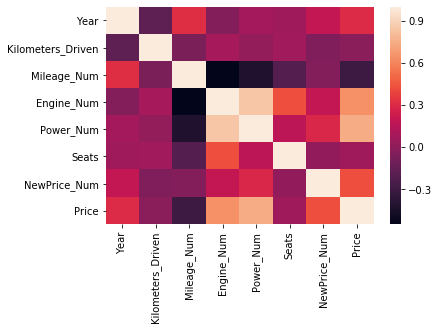

In [70]:
sns.heatmap(train.corr())

In [0]:
sns.pairplot(train,diag_kind='kde',kind='scatter')

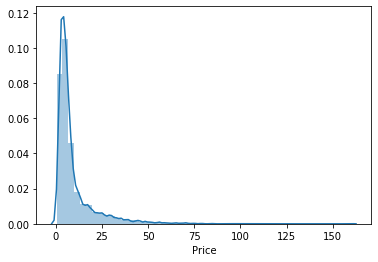

In [72]:
sns.distplot(train['Price'])

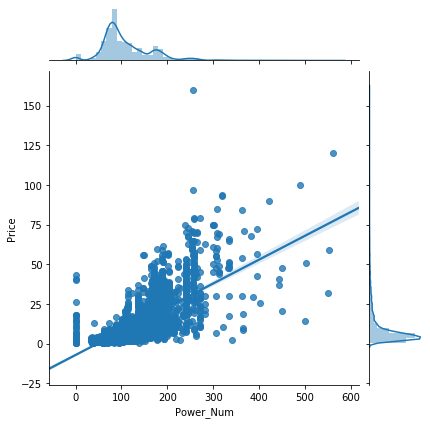

In [73]:
sns.jointplot(x='Power_Num',y='Price',data=train,kind='reg')

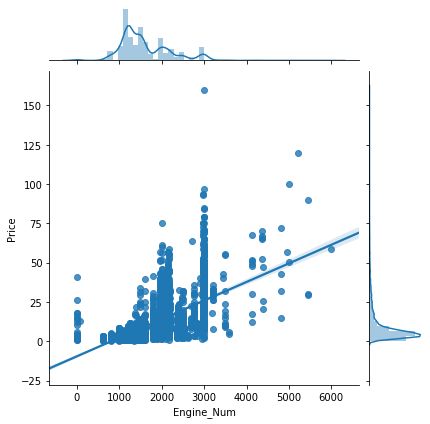

In [74]:
sns.jointplot('Engine_Num','Price',data=train,kind='reg')

In [0]:
sns.jointplot('NewPrice_Num','Price',data=train,kind='reg')

In [0]:
sns.jointplot('Year','Price',data=train,kind='reg')

In [0]:
sns.jointplot('Mileage_Num','Price',data=train,kind='reg')

In [0]:
sns.jointplot('Seats','Price',data=train,kind='reg')

In [0]:
sns.jointplot('Kilometers_Driven','Price',data=train,kind='reg')

In [80]:
catF.columns

Index(['Name', 'Comp_Name', 'Location', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')

In [81]:
catF=catF.drop(['Name','Mileage','Engine','Power','New_Price'],axis=1)
catF.head()

,Comp_Name,Location,Fuel_Type,Transmission,Owner_Type
0,Maruti,Mumbai,CNG,Manual,First
1,Hyundai,Pune,Diesel,Manual,First
2,Honda,Chennai,Petrol,Manual,First
3,Maruti,Chennai,Diesel,Manual,First
4,Audi,Coimbatore,Diesel,Automatic,Second


In [82]:
Nominal_cat=catF.loc[:,['Comp_Name','Location','Fuel_Type']]
Nominal_cat.head()

,Comp_Name,Location,Fuel_Type
0,Maruti,Mumbai,CNG
1,Hyundai,Pune,Diesel
2,Honda,Chennai,Petrol
3,Maruti,Chennai,Diesel
4,Audi,Coimbatore,Diesel


In [83]:
Ordinal_cat=catF.loc[:,['Transmission','Owner_Type']]
Ordinal_cat

,Transmission,Owner_Type
0,Manual,First
1,Manual,First
2,Manual,First
3,Manual,First
4,Automatic,Second
...,...,...
6014,Manual,First
6015,Manual,First
6016,Manual,Second
6017,Manual,First


In [84]:
'''
oe=OrdinalEncoder(categories=[['Manual','Automatic']])
oe.fit_transform([Ordinal_cat['Transmission']])
'''

"\noe=OrdinalEncoder(categories=[['Manual','Automatic']])\noe.fit_transform([Ordinal_cat['Transmission']])\n"

In [85]:
Ordinal_cat['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [86]:
Ordinal_cat['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [0]:
trans_temp={'Manual':1,'Automatic':2}
own_temp={'Fourth & Above':1,'Third':2,'Second':3,'First':4}
Ordinal_cat['Transmission_enc']=Ordinal_cat.Transmission.map(trans_temp)
Ordinal_cat['OwnerType_enc']=Ordinal_cat.Owner_Type.map(own_temp)

In [88]:
Ordinal_cat

,Transmission,Owner_Type,Transmission_enc,OwnerType_enc
0,Manual,First,1,4
1,Manual,First,1,4
2,Manual,First,1,4
3,Manual,First,1,4
4,Automatic,Second,2,3
...,...,...,...,...
6014,Manual,First,1,4
6015,Manual,First,1,4
6016,Manual,Second,1,3
6017,Manual,First,1,4


In [89]:
dm=pd.get_dummies(data=Nominal_cat)
dm

,Comp_Name_Ambassador,Comp_Name_Audi,Comp_Name_BMW,Comp_Name_Bentley,Comp_Name_Chevrolet,Comp_Name_Datsun,Comp_Name_Fiat,Comp_Name_Force One LX,Comp_Name_Ford,Comp_Name_Honda,Comp_Name_Hyundai,Comp_Name_Isuzu,Comp_Name_Jaguar,Comp_Name_Jeep,Comp_Name_Lamborghini,Comp_Name_Land Rover,Comp_Name_Mahindra,Comp_Name_Maruti,Comp_Name_Mercedes-Benz,Comp_Name_Mini Cooper,Comp_Name_Mitsubishi,Comp_Name_Nissan,Comp_Name_Porsche,Comp_Name_Renault,Comp_Name_Skoda,Comp_Name_Smart,Comp_Name_Tata,Comp_Name_Toyota,Comp_Name_Volkswagen,Comp_Name_Volvo,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
6015,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
6016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
6017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [90]:
y=train['Price']
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

In [98]:
x=pd.concat([dm,Ordinal_cat.loc[:,['Transmission_enc','OwnerType_enc']],numF.drop('Price',axis=1)],axis=1)
x['Mileage_Num'].astype(float)
x['Engine_Num'].astype(float)
x['Power_Num'].astype(float)
x['NewPrice_Num'].astype(float)
x

,Comp_Name_Ambassador,Comp_Name_Audi,Comp_Name_BMW,Comp_Name_Bentley,Comp_Name_Chevrolet,Comp_Name_Datsun,Comp_Name_Fiat,Comp_Name_Force One LX,Comp_Name_Ford,Comp_Name_Honda,Comp_Name_Hyundai,Comp_Name_Isuzu,Comp_Name_Jaguar,Comp_Name_Jeep,Comp_Name_Lamborghini,Comp_Name_Land Rover,Comp_Name_Mahindra,Comp_Name_Maruti,Comp_Name_Mercedes-Benz,Comp_Name_Mini Cooper,Comp_Name_Mitsubishi,Comp_Name_Nissan,Comp_Name_Porsche,Comp_Name_Renault,Comp_Name_Skoda,Comp_Name_Smart,Comp_Name_Tata,Comp_Name_Toyota,Comp_Name_Volkswagen,Comp_Name_Volvo,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_enc,OwnerType_enc,Year,Kilometers_Driven,Seats,Mileage_Num,Engine_Num,Power_Num,NewPrice_Num
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,4,2010,72000,5.0,26.6,998,58.16,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,4,2015,41000,5.0,19.67,1582,126.2,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,2011,46000,5.0,18.2,1199,88.7,8.61
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,4,2012,87000,7.0,20.77,1248,88.76,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2,3,2013,40670,5.0,15.2,1968,140.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,2014,27365,5.0,28.4,1248,74,7.88
6015,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,4,2015,100000,5.0,24.4,1120,71,0
6016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,3,2012,55000,8.0,14.0,2498,112,0
6017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,4,2013,46000,5.0,18.9,998,67.1,0


In [0]:
lr=LinearRegression()

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [102]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
df=pd.DataFrame({'Actual':y_test,'Predicted':lr.predict(x_test)})
df.head(20)

,Actual,Predicted
5206,8.00,8.889723
4147,6.67,7.692160
2077,1.50,1.054984
362,3.25,4.157345
2853,7.75,8.017927
5003,2.75,-0.279627
4413,3.04,2.579309
2809,1.59,-1.775512
1053,7.20,6.214520
3140,5.27,8.405703


In [109]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr.predict(x_test)))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr.predict(x_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr.predict(x_test))))

Mean Absolute Error: 3.054479152021614
Mean Squared Error: 48.139677266828684
Root Mean Squared Error: 6.938276246073565
